<a href="https://colab.research.google.com/github/TamiTrav/MVP2_PUC/blob/main/mvp2_tamiris_travassos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Machine Learning e Deep Learning


# Profs. Hugo Villamizar e Patrick Happ

# **Aluna: Tamiris Severino Travassos**

# PARTE 1 - MACHINE LEARNING

#1.Definição do problema

**Objetivo: entender e descrever claramente o problema que está sendo resolvido.**

Qual é a descrição do problema?


*   Clientes de uma instituição financeira que estão ou não propensos a sair do banco
*   O objetivo é encontrar quem está propenso a sair do banco


Você tem premissas ou hipóteses sobre o problema? Quais?

1.1.Informações sobre os atributos


1. Customer Id - identificação única do cliente

2. Surname - Sobrenome

3. Credit Score - Pontuação com o cartão de crédito

4. Geographic - Pais do cliente

5. Gender - Sexo (Feminino ou Masculino)

6. Age - Idade do cliente

7. Ternure - Tempo em anos que o cliente está no banco

8. Balance - Saldo bancário do cliente

9. Num of Produtcs - Número de produtos bancários que o cliente esta usando

10. Has Cr Cards - Possui ou nao cartao de crédito do banco

11. Is Active Member - Cliente é ou não um membro ativo

12. Estimated Salary - Salário estimado do cliente (em dólares)

13. Exited - Churn (0 se o cliente permanece no banco e 1 se ele saiu)


In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import missingno as ms #para o tratamento de missing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#2.Carga de dados

In [ ]:
# Carrega arquivo csv usando Pandas, o banco de dados está no github
# Informa a URL de importação dos datasets

In [9]:
# Lê o arquivo
banco_original = pd.read_csv('https://raw.githubusercontent.com/TamiTrav/MVP2_PUC/main/Churn_Modelling.csv', sep=',')

# Mostra as primeiras linhas do dataset
banco_original.head()

#banco_original.shape

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Visualizando o tipo de dados
banco_original.info()

In [10]:
# Retirando variáveis com alta cardinalidade ou variáveis de contagem
banco_original.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)
banco_original.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Verificando a distribuição das classes
banco_original.groupby('Exited').size()

In [ ]:
# verificando nulls no dataset
banco_original.isnull().sum()

# salvando um novo dataset para verificar os missings
# recuperando o nome das colunas
col = list(banco_original.columns)

# o novo data set ira conter todas as colunas do dataset original
datasetSemMissing =banco_original[col[:]]

ms.matrix(datasetSemMissing)

# Nas variáveis numéricas não temos missings e é normal ter valores iguais a 0, e dentro das categoricas não temos nenhum 0
#então não é necessário aplicar tratamento de NA. Fiz apenas a verificação se não tinha missing.

#3.Preparação dos dados

**Objetivo: realizar operações de preparação dos dados.**

3.1.Separação em conjunto de treino e conjunto de teste com holdout

Separe o dataset entre treino e teste (e validação, se aplicável).

Faz sentido utilizar um método de validação cruzada? Justifique se não utilizar.


Verifique quais operações de transformação de dados (como normalização e padronização, transformação de imagens em tensores) são mais apropriadas para o seu problema e salve visões diferentes do seu dataset para posterior avaliação dos modelos.

Refine a quantidade de atributos disponíveis, realizando o processo de feature selection de forma adequada.

In [ ]:
#Teste sem Feature Selection

In [ ]:
# Usando o dummy encoding para criar variaveis Dummy para as duas variáveis categóricas: Gender e Geography, antes da divisão dos dados em treino e teste

data = pd.concat([pd.get_dummies(banco_original[['Gender', 'Geography']]), banco_original[['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary','Exited']]], axis=1)
data.head()

In [14]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste (houldout), onde X serão os atributos e Y será o target/classe
array = data.values

X = array[:,0:13]
y = array[:,13]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada.
#Usarei a validação cruzada para treinar e avaliar os modelos usando a métrica acurácia
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

3.2.Criação e avaliação de modelos

KNN: 0.756125 (0.007277)
CART: 0.792625 (0.009991)
NB: 0.786125 (0.005198)
SVM: 0.796250 (0.000000)
Bagging: 0.853250 (0.013184)
RF: 0.857500 (0.012575)
ET: 0.849875 (0.011117)
Ada: 0.852375 (0.011018)
GB: 0.863375 (0.010855)
Voting: 0.796250 (0.000000)


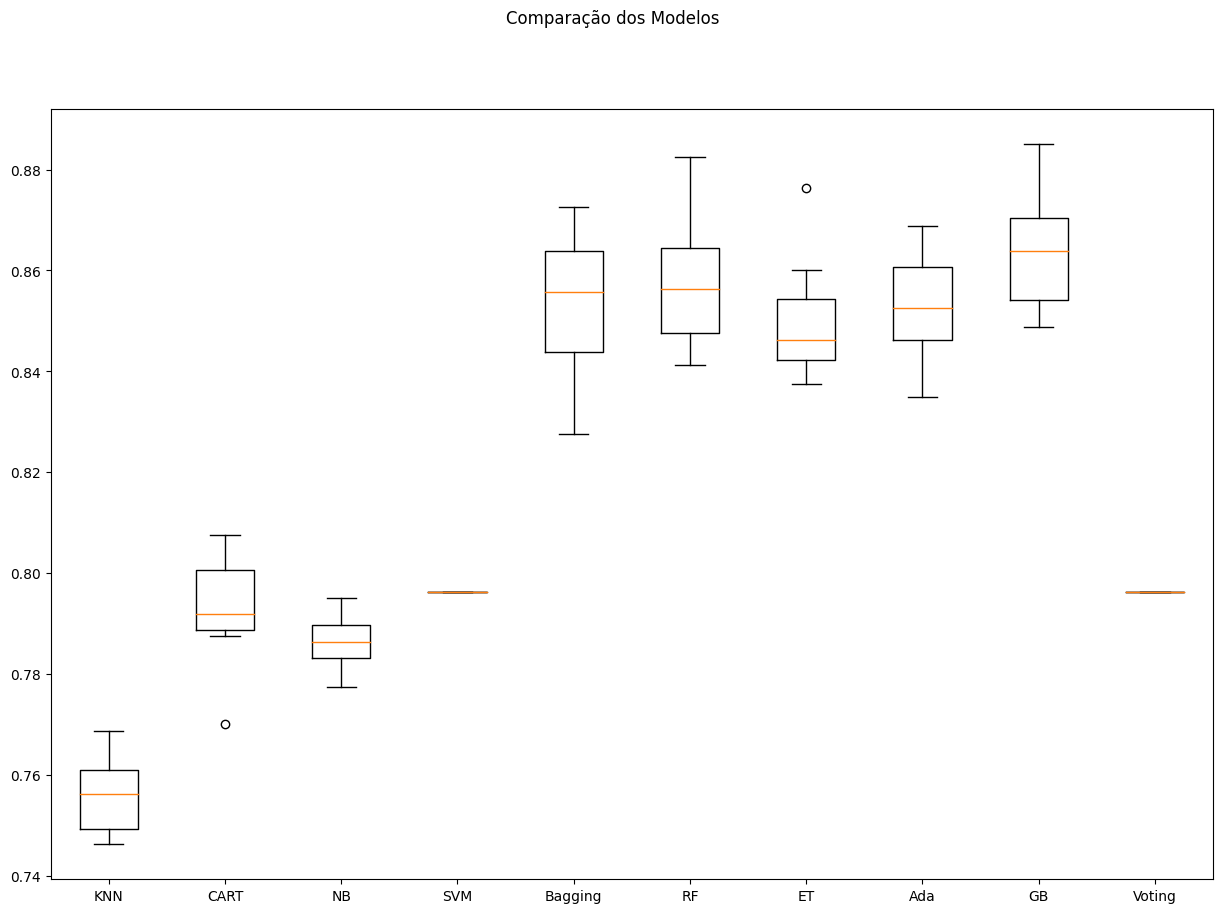

In [15]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
#model1 = LogisticRegression(max_iter=200)
#bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos: Com a base de treino rodamos a validação cruzada a fim de escolher o melhor modelo para depois rodar o modelo
#escolhido com todos os dados de treino.
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Após rodar o modelo com os dados originais, dentre todos modelos testados, o melhor foi o de Bayes, cuja acurácia foi a melhor de todos, de  0,8633.

3.3.Criação e avaliação de modelos: dados padronizados e normalizados

Agora irmeos testar modelos com operações de transformação de dados, como normalização e padronização para verificar quais deles são mais apropriadas para o nosso problema.

LR-orig: 0.791 (0.006)
KNN-orig: 0.756 (0.007)
CART-orig: 0.793 (0.010)
NB-orig: 0.786 (0.005)
SVM-orig: 0.796 (0.000)
Bag-orig: 0.853 (0.013)
RF-orig: 0.857 (0.013)
ET-orig: 0.850 (0.011)
Ada-orig: 0.852 (0.011)
GB-orig: 0.863 (0.011)
Vot-orig: 0.796 (0.000)
LR-padr: 0.810 (0.008)
KNN-padr: 0.824 (0.008)
CART-padr: 0.793 (0.012)
NB-padr: 0.813 (0.009)
SVM-padr: 0.852 (0.009)
Bag-padr: 0.854 (0.012)
RF-padr: 0.858 (0.012)
ET-padr: 0.850 (0.013)
Ada-padr: 0.852 (0.011)
GB-padr: 0.863 (0.011)
Vot-padr: 0.845 (0.006)
LR-norm: 0.810 (0.008)
KNN-norm: 0.814 (0.010)
CART-norm: 0.792 (0.013)
NB-norm: 0.813 (0.009)
SVM-norm: 0.834 (0.008)
Bag-norm: 0.853 (0.012)
RF-norm: 0.858 (0.013)
ET-norm: 0.850 (0.011)
Ada-norm: 0.852 (0.011)
GB-norm: 0.863 (0.011)
Vot-norm: 0.830 (0.007)


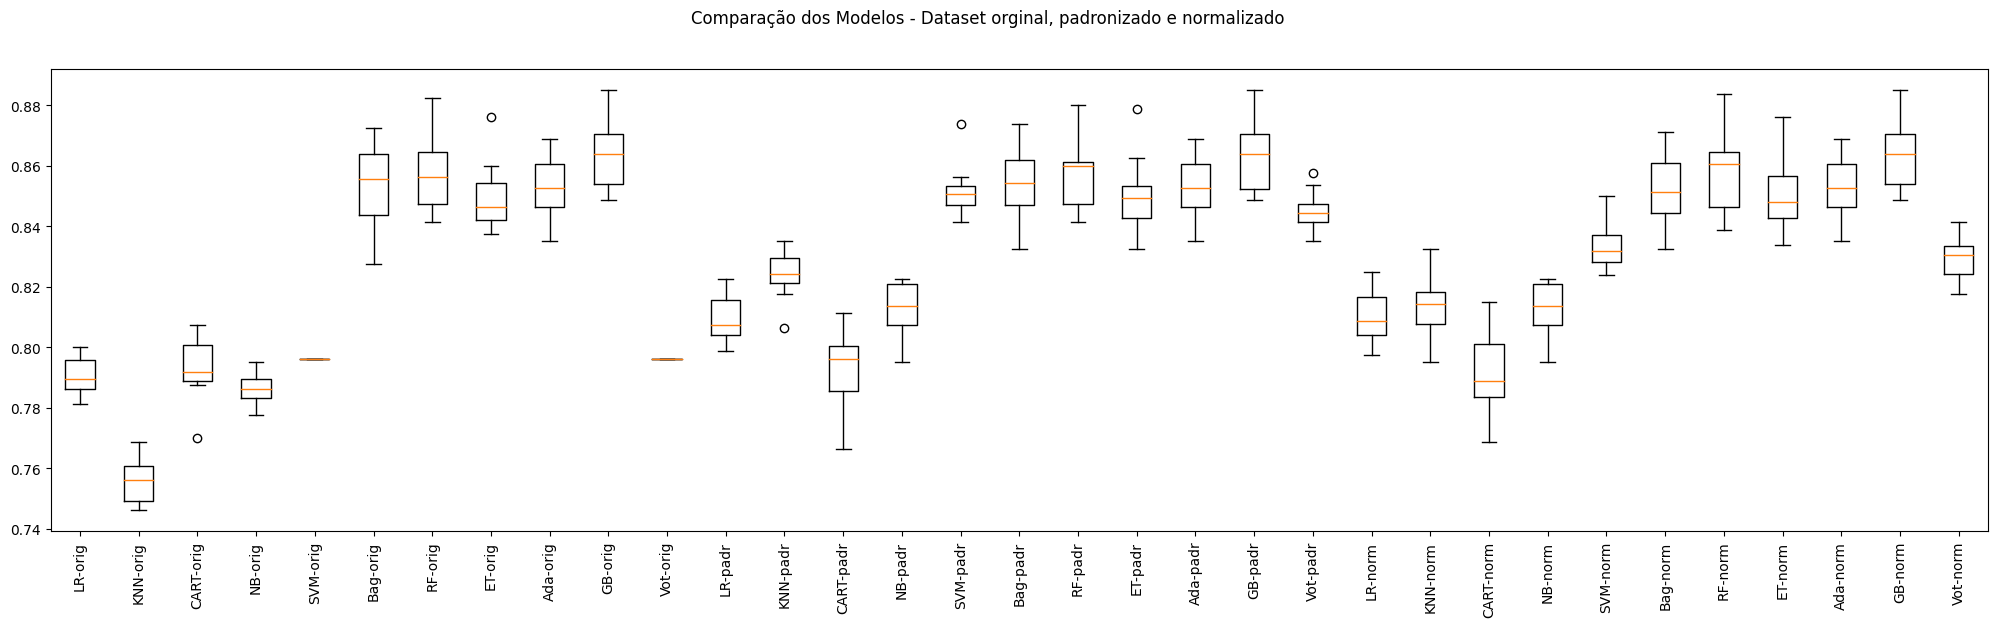

In [16]:
#Vamos repetir esse processo, utilizando a biblioteca Pipeline para criar e avaliar os modelos através da validação cruzada
#com os dados padronizados e normalizados (evitando o data leakage)
#e comparar o seu resultado com os modelos treinados com o dataset original

np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines através da validação cruzada
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

#5.Modelagem e Treinamento

**Objetivo: construir modelos para resolver o problema em questão.**

Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas.
Há algum ajuste inicial para os hiperparâmetros?
O modelo foi devidamente treinado? Foi observado problema de underfitting?
É possível otimizar os hiperparâmetros de algum dos modelos? Se sim, faça-o, justificando todas as escolhas.
Há algum método avançado ou mais complexo que possa ser avaliado?
Posso criar um comitê de modelos diferentes para o problema (ensembles)?

O algoritmo que teve a melhor acurácia de teste, foi o GB padronizado e normalizado, cujo valor da acurácia foi de 0,863.

5.2.Otimização dos hiperparâmetros

Agora irei verificar se é possível encontrar uma configuração de modelo que supere os melhores resultados até o momento. Através da biblioteca Grid Search irei executar a otimização dos hiperparâmetros do algoritmo escolhido
GB.

Para tal, tentaremos todos os valores ímpares de k entre 1 e 21 e diferentes métricas de distância. Você pode experimentar também fazer a otimização de outros algoritmos para

In [31]:
# Tuning do modelo escolhido

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('GB-orig', Pipeline(steps=[gradient_boosting])))
pipelines.append(('GB-padr', Pipeline(steps=[standard_scaler, gradient_boosting])))
pipelines.append(('GB-norm', Pipeline(steps=[min_max_scaler, gradient_boosting])))


param_grid = {'GB__var_smoothing': np.logspace(0,-9, num=num_trees)}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, verbose=1)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


ValueError: ignored

5.3.Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

x.1.Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
#Teste com Feature Selection

In [ ]:
# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# 6.Avaliação dos resultados

**Objetivo: analisar o desempenho dos modelos gerados em dados não vistos (com a base de teste)**

Selecione as métricas de avaliação condizentes com o problema, justificando.

Treine o modelo escolhido com toda a base de treino, e teste-o com a base de teste.

Os resultados fazem sentido?

Foi observado algum problema de overfitting?

Compare os resultados de diferentes modelos.

Descreva a melhor solução encontrada, justificando.

# PARTE 2 - DEEP LEARNING

#**1.Definição do problema**